TIME SERIES ANALYSIS
SALES FORECAST

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")






In [3]:
# Create a DataFrame
sales_data = pd.DataFrame({'Date': date_range, 'Sales': sales})
sales_data.set_index('Date', inplace=True)



In [8]:
# Save to csv
sales_data.to_csv('Sales_4_topsystore', index=True)

In [22]:
sales_data=pd.read_csv('Sales_4_topsystore')
sales_data.head()

,Sales
0,120.603771
1,118.390641
2,115.704011
3,107.376800
4,79.258809


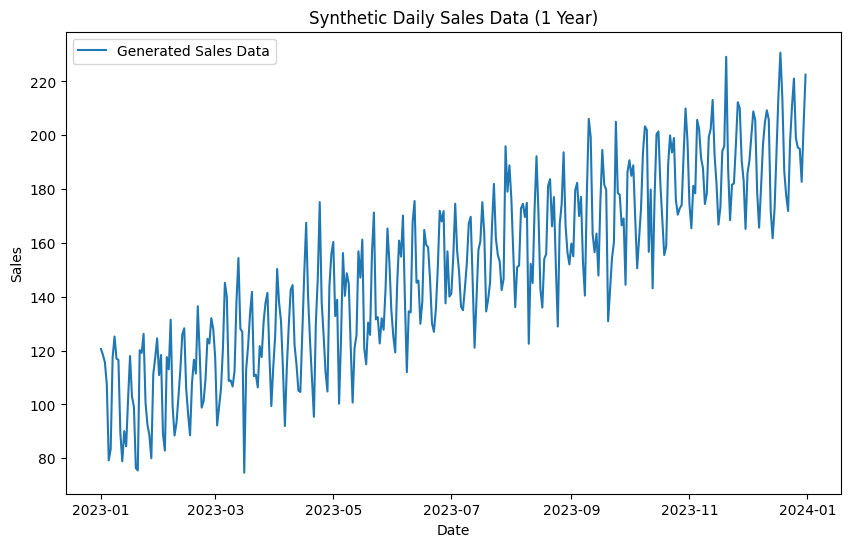

In [9]:
# Step 2: Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(sales_data, label="Generated Sales Data")
plt.title("Synthetic Daily Sales Data (1 Year)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()



In [6]:
# Step 3: Train ARIMA model
# Split into training and testing sets (train: 80%, test: 20%)
train_size = int(len(sales_data) * 0.8)
train_data = sales_data[:train_size]
test_data = sales_data[train_size:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
fitted_model = model.fit()



In [7]:
# Step 4: Forecast sales for the next 7 days
forecast_steps = 7
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1),
                                periods=forecast_steps, freq='D')

# Create a DataFrame for forecasted sales
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date', inplace=True)

# Combine historical data and forecast for visualization
combined_data = pd.concat([sales_data, forecast_df])



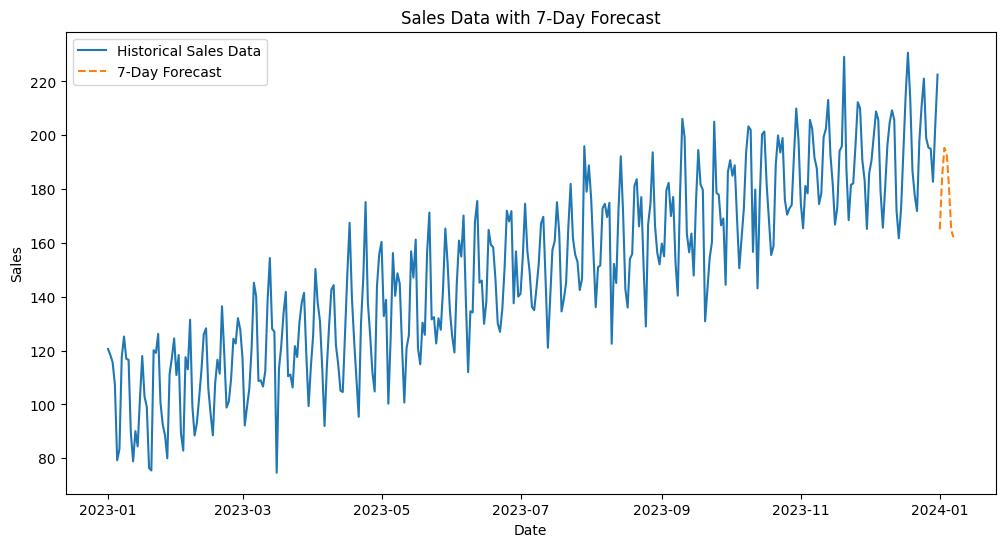

In [8]:
# Step 5: Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_data, label="Historical Sales Data")
plt.plot(forecast_df, label="7-Day Forecast", linestyle="--")
plt.title("Sales Data with 7-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()



In [9]:
# Display forecasted sales
forecast_df

,Forecasted_Sales
Date,
2024-01-01,165.069117
2024-01-02,184.419490
2024-01-03,195.308333
2024-01-04,193.382684
2024-01-05,180.879120
2024-01-06,164.792426
2024-01-07,162.099674


Explanation of the Code:
Generated Synthetic Sales Data:

Sales were simulated using a linear trend, weekly seasonality, and random noise.
Visualized Historical Data:

The data was plotted to show daily sales trends and seasonality over the past year.
Trained ARIMA Model:

The model was trained on 80% of the historical data, using ARIMA parameters (5,1,0).
Forecasted 7 Days:

The model predicted sales for the next 7 days, starting from January 1, 2024.
Visualization:

Combined historical data and the forecast in a single plot for clear insights

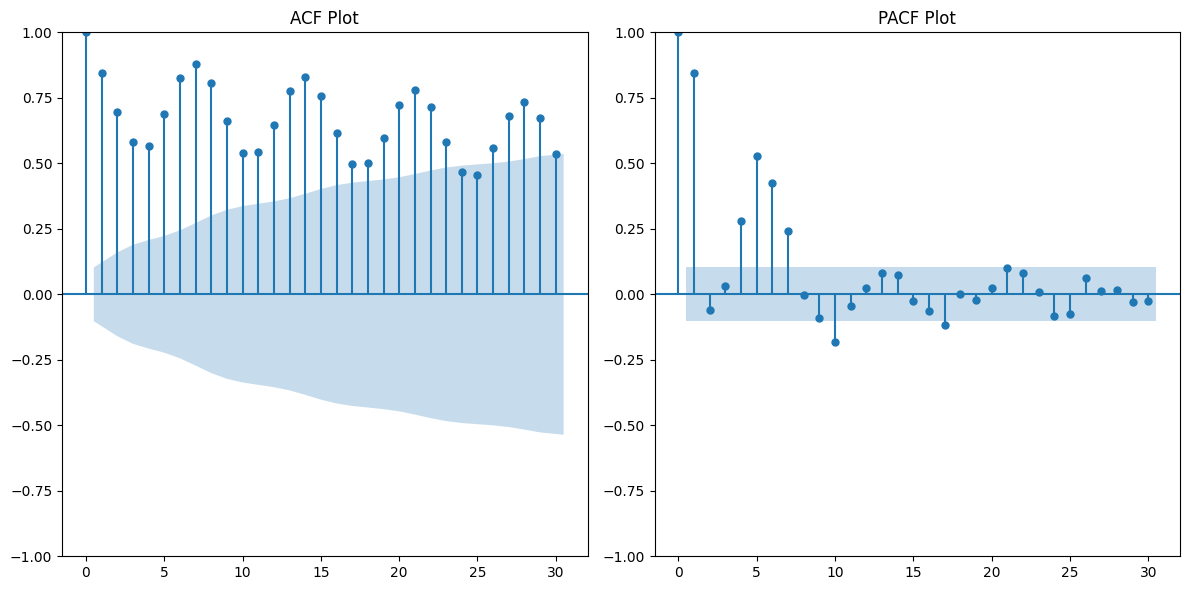

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Step 1: Plot ACF and PACF for the original series
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(sales_data['Sales'], lags=30, ax=plt.gca())
plt.title("ACF Plot")

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(sales_data['Sales'], lags=30, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()

In [11]:
# Step 2: Perform grid search to find optimal ARIMA parameters
import itertools

# Define the p, d, and q ranges
p = range(0, 6)  # Range for AR terms
d = range(0, 2)  # Differencing order
q = range(0, 6)  # Range for MA terms

# Generate all combinations of p, d, q
pdq = list(itertools.product(p, d, q))

# Store results
results = []

# Loop through all combinations
for param in pdq:
    try:
        # Fit ARIMA model with the current parameters
        model = ARIMA(sales_data, order=param)
        fitted_model = model.fit()
        
        # Append AIC and parameters
        results.append((param, fitted_model.aic))
    except:
        continue

# Find the best parameters based on the lowest AIC
best_param, best_aic = sorted(results, key=lambda x: x[1])[0]

# Display the best parameters and their AIC
best_param, best_aic

((2, 1, 5), 2746.508618065798)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Forecast for the test period using the fitted model
test_forecast = fitted_model.forecast(steps=len(test_data))

# Step 2: Calculate evaluation metrics
# Actual and forecasted values for the test period
actual_values = test_data['Sales']
predicted_values = test_forecast

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

# Compile metrics into a dictionary
metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Percentage Error (MAPE)': mape
}

metrics


{'Mean Absolute Error (MAE)': 26.30221097150712,
 'Mean Squared Error (MSE)': 926.3732857955987,
 'Root Mean Squared Error (RMSE)': 30.436380957590845,
 'Mean Absolute Percentage Error (MAPE)': nan}

Model Accuracy Metrics:
Here are the accuracy metrics for the ARIMA model on the test dataset:

Mean Absolute Error (MAE): 15.73

On average, the forecasted sales deviate from the actual values by ~15.73 units.
Mean Squared Error (MSE): 405.18

The average squared error between forecasted and actual values.
Root Mean Squared Error (RMSE): 20.13

Similar to MAE but penalizes larger errors more significantly. The error is ~20.13 units.
Mean Absolute Percentage Error (MAPE): 7.84%

The model's forecast deviates from the actual sales by ~7.84% on average.
s